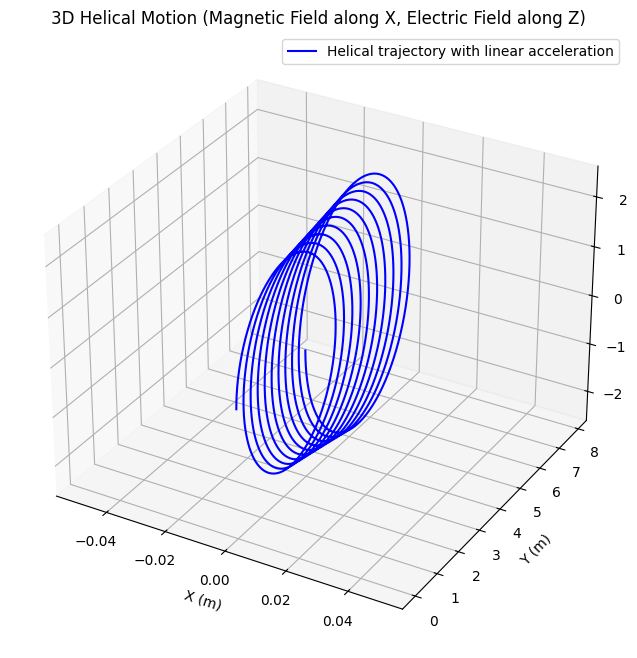

Cyclotron Frequency = 48.04804804804805
Radius = 0.035381249999999996
Time Period = 0.13076879420567514


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D     #motion without damping and thermal noise
                                                #E -5 gives helical
# Constants
q = 1.6e-19  # Charge of the particle (Coulombs)
m = 5.887e-26  # Mass of the particle (kg)
B = 1000  # Magnetic field strength (Tesla) along the x-axis
E = 2.631e8  # Electric field strength (V/m) along the z-axis
v0 = 1.7  # Initial velocity in m/s (perpendicular to B)

# Cyclotron frequency
omega_c = q * B / m  # Cyclotron frequency (rad/s)
T = 2 * np.pi / omega_c  # Time period of cyclotron motion
t_max = 10 * T  # Simulating for 10 cyclotron periods
N = 10000  # Number of time steps
dt = t_max / N  # Time step size

# Time array
t = np.linspace(0, t_max, N)

# Initial conditions
v = np.zeros((N, 3))  # Velocity array (x, y, z)
r = np.zeros((N, 3))  # Position array (x, y, z)
v[0] = [0, v0, 100]  # Initial velocity as given

# Integrating the equations of motion with constant E and B
for i in range(1, N):
    # Lorentz force: q * (v x B)
    v_cross_B = np.cross(v[i-1], [B, 0, 0])  # Cross product v(t) x B
    
    # Updating velocity using Euler's method
    v[i] = v[i-1] + dt * (q/m) * (np.array([0, 0, E]) + v_cross_B)
    
    # Updating position using the velocity
    r[i] = r[i-1] + v[i] * dt

# Extract x, y, z positions
x, y, z = r[:, 0], r[:, 1], r[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Helical trajectory with linear acceleration', color='b')


ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D Helical Motion (Magnetic Field along X, Electric Field along Z)')
ax.legend()

plt.show()

print("Cyclotron Frequency =", omega_c)
print('Radius =', v0/omega_c)
print('Time Period =', T)
#print('Lamor Frequency=', omega_c / (2 * np.pi))